# Chapter 3

In [1]:
%matplotlib inline
import random
import torch
from torch import nn
from d2l import torch as d2l

## Linear regression

In [2]:
model = d2l.LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2,-3.4]), b=4.2)

In [3]:
print('features', data.X[0], '\nlabel:', data.y[0])

features tensor([ 0.2971, -0.5301]) 
label: tensor([6.6046])


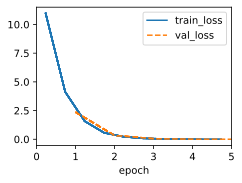

In [4]:

trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

In [5]:
with torch.no_grad():
    print(f"error in estimating w: {data.w - model.w.reshape(data.w.shape)}")
    print(f"error in estimating b: {data.b - model.b}")

error in estimating w: tensor([ 0.0162, -0.0243])
error in estimating b: tensor([0.0301])


## Norms and Weight Decay

In [6]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n,1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

In [7]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) + self.lambd * l2_penalty(self.w))

In [8]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale = "log"
    trainer.fit(model, data)
    print("L2 norm of w:", float(l2_penalty(model.w)))

L2 norm of w: 0.008780322968959808


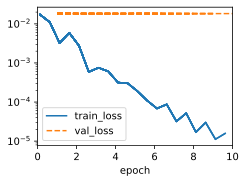

In [9]:
train_scratch(0)

L2 norm of w: 0.0013500616187229753


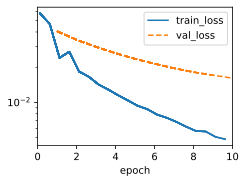

In [10]:
train_scratch(3)

In [11]:
# More succint version
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {"params": self.net.weight, "weight_decay": self.wd},
            {"params": self.net.bias}
        ], lr=self.lr)

def train_succint(wd):
    model = WeightDecay(wd=wd, lr=0.01)
    model.board.yscale = "log"
    trainer.fit(model, data)
    print("L2 norm of w:", float(l2_penalty(model.get_w_b()[0])))

L2 norm of w: 0.14192084968090057


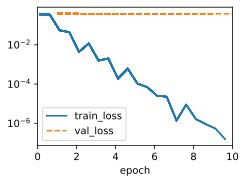

In [12]:
train_succint(0)

L2 norm of w: 0.002109368098899722


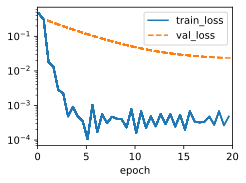

In [13]:
trainer = d2l.Trainer(max_epochs=20)
train_succint(3)